In [1]:
from sympy import *
from sympy.polys import groebnertools as gt
init_printing()
from sympy.polys.rings import PolyRing

In [2]:
def symbolize(p, erzeuger, name='x'):
    symbols = [Symbol('{}_{}'.format(name, j+1)) for j in range(len(erzeuger))]
    res = 0
    for key, value in p.to_dict().items():
        m = value
        for symbol, exponent in zip(symbols, key):
            m *= symbol ** exponent
        res += m
    return res        

In [3]:
P, x = xring('x1,x2,x3,x4,x5', QQ, lex)

In [4]:
F = []
y = 2*x 
for j in range(1,len(x)):
    p = 0
    for i in range(len(x)):
        m = 1
        for k in range(i, i+j):
            m *= y[k]
        p += m
    F.append(p)
m = 1
for t in x:
    m *= t
F.append(m-1)
[symbolize(s, x) for s in F]

In [5]:
G = gt.groebner(F, P)

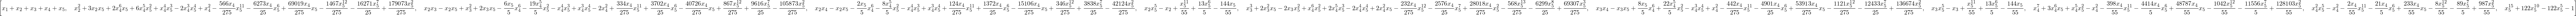

In [6]:
[symbolize(g, x) for g in G]

In [7]:
len(G)

In [8]:
y = ','.join([repr(xi).replace('x', 'y') for xi in x])

In [9]:
Q13 = PolyRing(y, FiniteField(13), lex)

In [10]:
F13 = [Q13.from_dict(s.to_dict()) for s in F]

In [11]:
F13


[y1 + y2 + y3 + y4 + y5,
 y1*y2 + y1*y5 + y2*y3 + y3*y4 + y4*y5,
 y1*y2*y3 + y1*y2*y5 + y1*y4*y5 + y2*y3*y4 + y3*y4*y5,
 y1*y2*y3*y4 + y1*y2*y3*y5 + y1*y2*y4*y5 + y1*y3*y4*y5 + y2*y3*y4*y5,
 y1*y2*y3*y4*y5 + 12 mod 13]

In [12]:
G13 = gt.groebner(F13, Q13)

In [13]:
[symbolize(g, y, 'y') for g in G13]